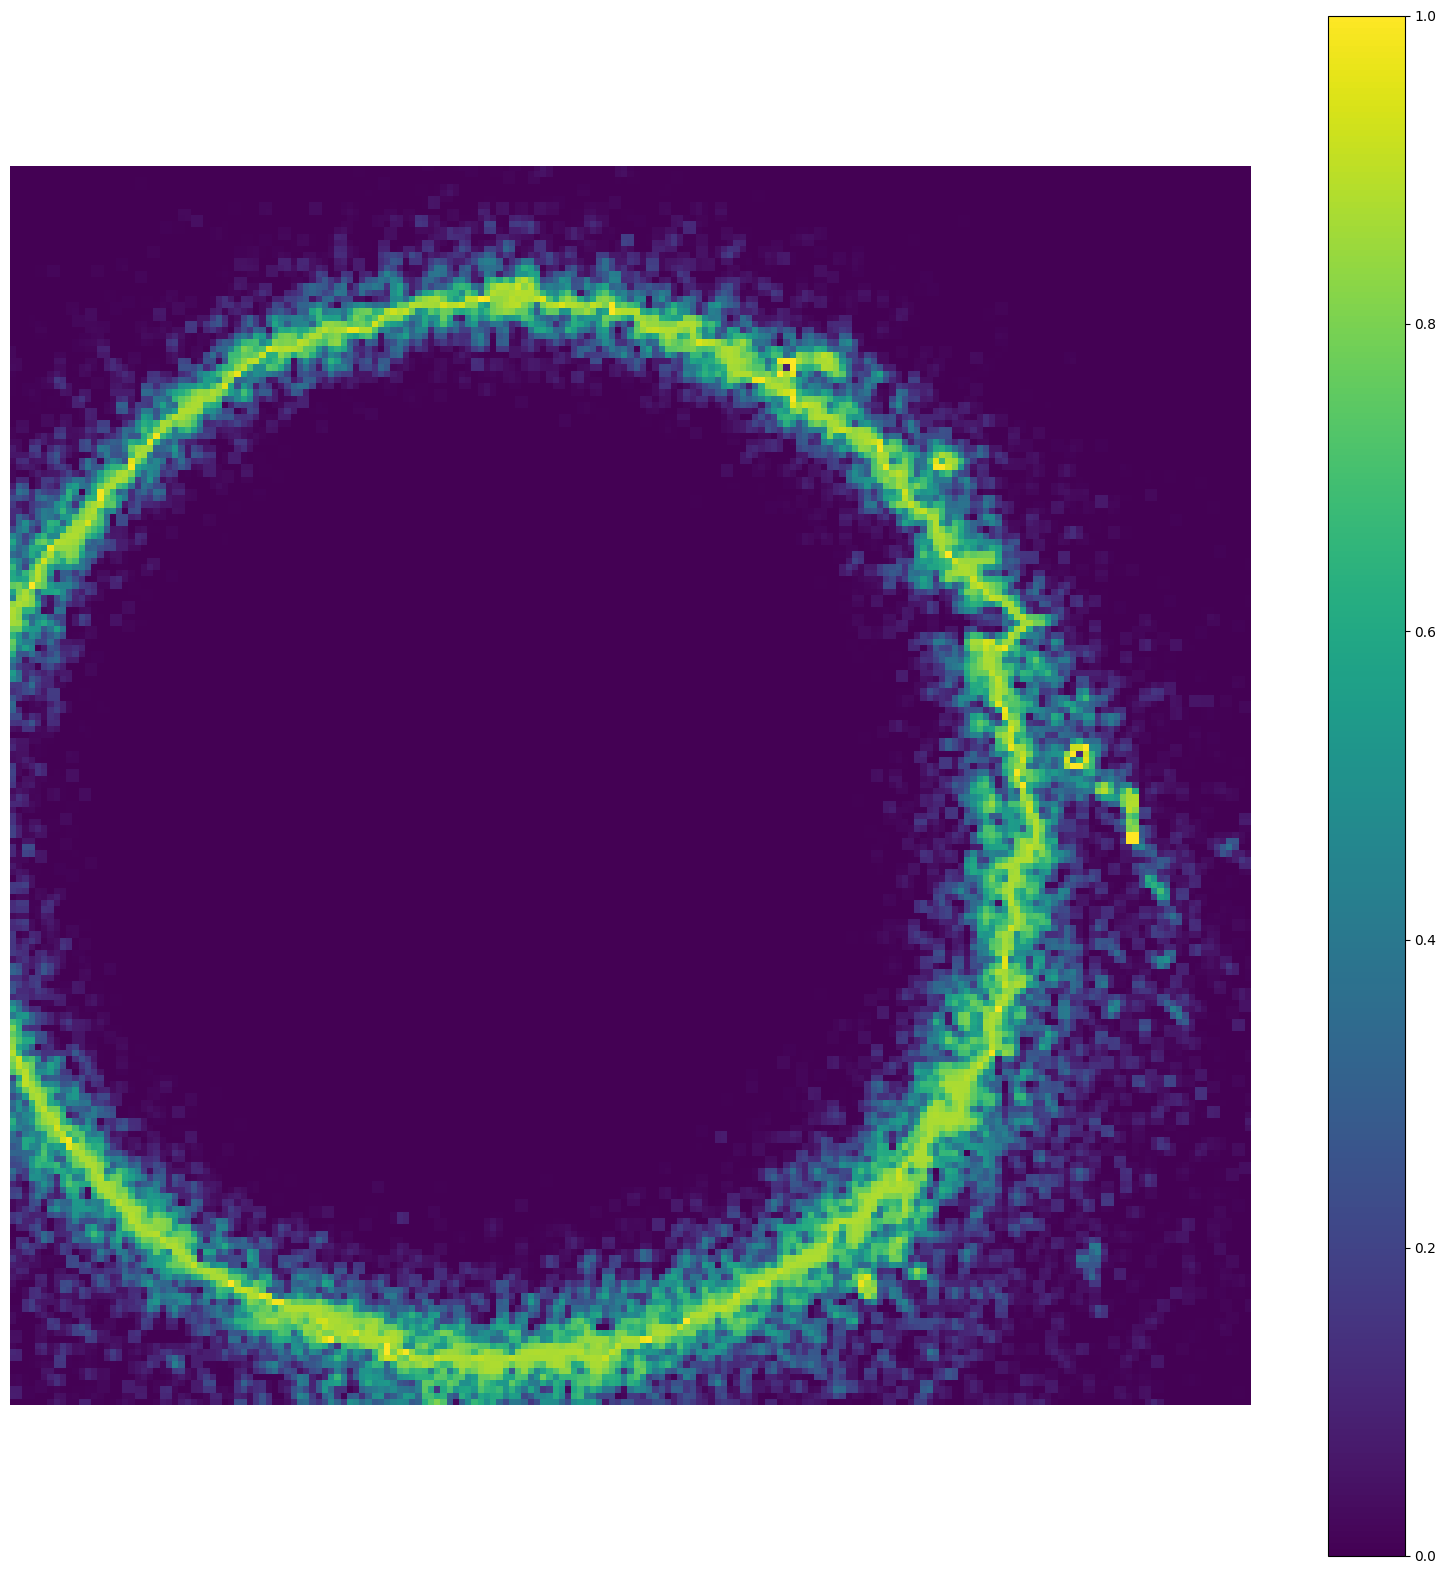

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data2D = 0
plot = 0
dataSd2D = 0


##### x, y: location. Return: mean and standard deviation to represent the data at [x,y]
##### DO NOT modify this function
def getDataValue(x, y):
    return data2D[x, y], dataSd2D[x, y]

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize():
    global data2D
    global plot
    global dataSd2D
    data2D = np.load("rawData.npy").transpose()
    dataSd2D = np.load("rawDataSd.npy").transpose()
    plot = np.zeros((data2D.shape[0]-1, data2D.shape[1]-1))

    plt.rcParams['figure.figsize'] = [20, 20]
    plt.axis('off')

##### (TODO) WORK on this function
##### compute and draw the uncertain isocontour of the given datavalue ("isovalue")
##### you should use "getDataVlue()" to get the data (Gaussian distribution) you want
##### Store the probability field in 'plot' to display
##### I do not mind the computation is efficnet or not

def computeFastPlotIsoContour(isovalue):
    for x in range(data2D.shape[0]-1):
        for y in range(data2D.shape[0]-1):

            v0, s0 = getDataValue(x, y)
            v1, s1 = getDataValue(x + 1, y)
            v2, s2 = getDataValue(x, y + 1)
            v3, s3 = getDataValue(x + 1, y + 1)
            
            p0 = norm.cdf(isovalue, loc=v0 , scale=s0 )
            p1 = norm.cdf(isovalue, loc=v1 , scale=s1 )
            p2 = norm.cdf(isovalue, loc=v2 , scale=s2 )
            p3 = norm.cdf(isovalue, loc=v3 , scale=s3 )

            #at least 1 point smaller than isovalue
            p_least = 1 - ( (1-p0) * (1-p1) * (1-p2) * (1-p3) )
            #all points smaller than isovalue
            p_all = p0 * p1 * p2 * p3

            # min < iso < max
            p_ans = p_least - p_all

            plot[x, y] = p_ans

    

    plt.imshow(plot, cmap='viridis', vmin=0, vmax=1)
    plt.colorbar()

# Using the function
Initialize()
computeFastPlotIsoContour(0)
plt.show()
